# 2D Circle

Draw a 2D circle.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(0,np.pi*2,100)

In [2]:
t

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

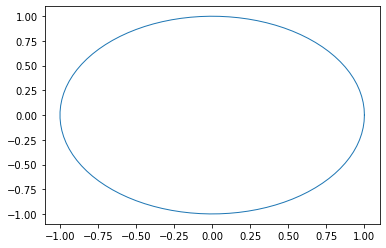

In [3]:
plt.plot(np.cos(t), np.sin(t), linewidth=1)

# Volume

We can show that the volume of the unit ball in higher dimensions tend to be distributed around the 'equator'.

Code reference: https://www.johndcook.com/blog/2017/07/13/concentration_of_measure/

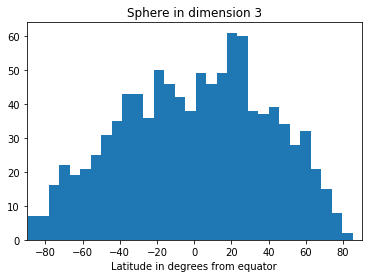

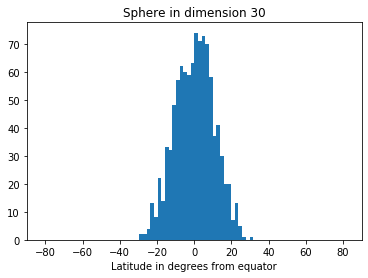

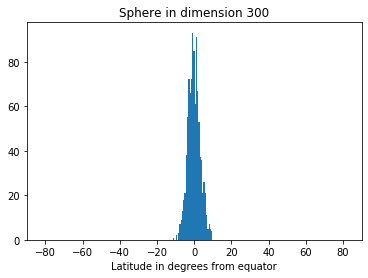

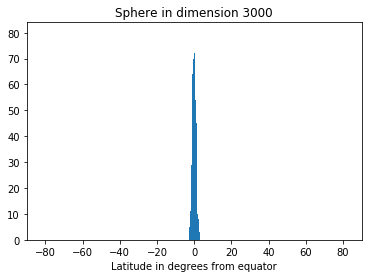

In [4]:
# https://www.johndcook.com/blog/2017/07/13/concentration_of_measure/

from scipy.stats import norm
from math import sqrt, pi, acos, degrees
import matplotlib.pyplot as plt

def pt_on_sphere(n):
    # Return random point on unit sphere in R^n.
    # Generate n standard normals and normalize length.
    x = norm.rvs(0, 1, n)
    length = sqrt(sum(x**2))
    return x/length

def latitude(x):
    # Latitude relative to plane with first coordinate zero.
    angle_to_pole = acos(x[0]) # in radians
    latitude_from_equator = 0.5*pi - angle_to_pole
    return degrees( latitude_from_equator )

N = 1000 # number of samples

for n in [3, 30, 300, 3000]: # dimension of R^n
    
    latitudes = [latitude(pt_on_sphere(n)) for _ in range(N)]
    plt.hist(latitudes, bins=int(sqrt(N)))
    plt.xlabel("Latitude in degrees from equator")
    plt.title("Sphere in dimension {}".format(n))
    plt.xlim((-90, 90))
    plt.show()

# Sampling Methods

## Polar method

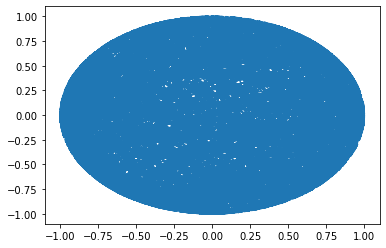

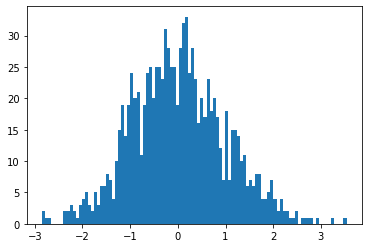

In [5]:
import math
import random
import matplotlib.pyplot as plt

x = []
y = []
r = []
for _ in range(1000):
    rnd = random.gauss(0,1)
    theta = 2 * math.pi * random.random()
    x.append(math.cos(theta)) 
    y.append(math.sin(theta))
    r.append(rnd)
    
plt.plot(x, y)
plt.show()
plt.hist(r, bins=100)
plt.show()

## Box-Muller transform

The Box Muller transform is a way to take a two samples from a uniform distribution and transform them into a pair in a Gaussian distribution.

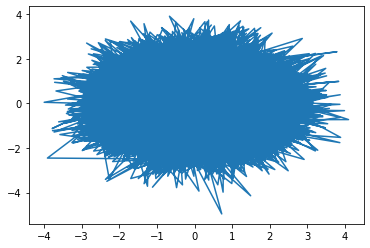

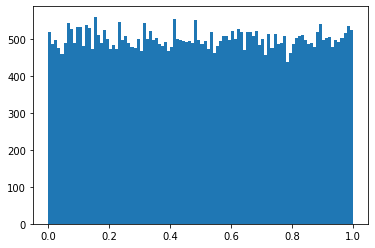

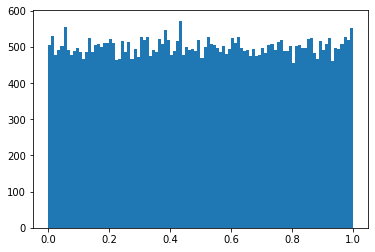

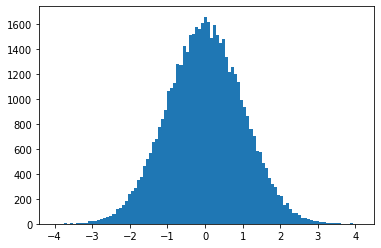

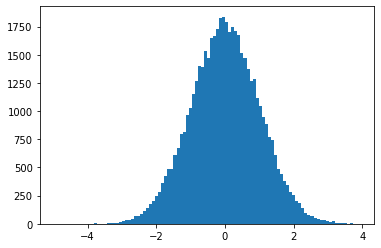

In [6]:
u = []
v = []
x = []
y = []
for _ in range(50000):
    r1 = np.random.uniform(0,1)
    r2 = np.random.uniform(0,1)
    u.append(r1)
    v.append(r2)
    x.append(math.sqrt(-2 * math.log(r1)) * math.cos(2 * math.pi * r2))
    y.append(math.sqrt(-2 * math.log(r1)) * math.sin(2 * math.pi * r2))

plt.plot(x, y)
plt.show()
plt.hist(u, bins=100)
plt.show()
plt.hist(v, bins=100)
plt.show()
plt.hist(x, bins=100)
plt.show()
plt.hist(y, bins=100)
plt.show()

## Inverse transform sampling

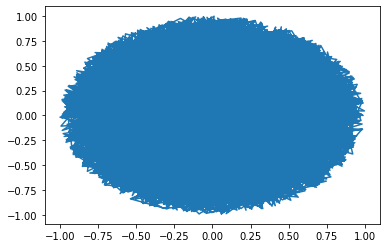

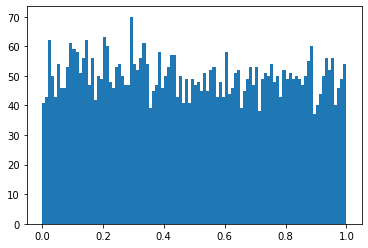

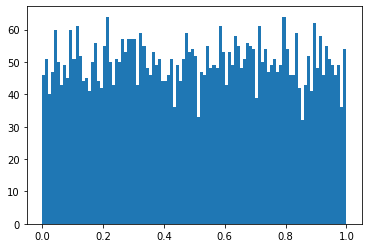

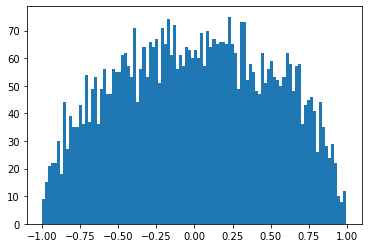

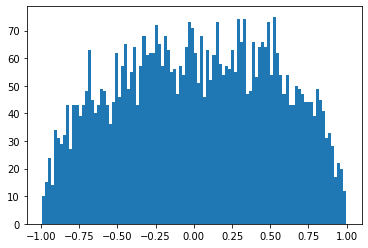

In [7]:
u = []
v = []
x = []
y = []
for _ in range(5000):
    r1 = random.random()
    r2 = random.random()
    r = r1**0.5  # sqrt function
    theta = 2 * math.pi * r2
    v.append(r1)
    u.append(r2)
    x.append(r * math.cos(theta))
    y.append(r * math.sin(theta))

plt.plot(x, y)
plt.show()
plt.hist(u, bins=100)
plt.show()
plt.hist(v, bins=100)
plt.show()
plt.hist(x, bins=100)
plt.show()
plt.hist(y, bins=100)
plt.show()